In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set plotting style
plt.style.use('ggplot')

# Define colors
c1 = (136, 34, 85)
c2 = (51, 34, 136)

In [3]:
# GRAPH 1: Bitcoin Difficulty
# Read data
data = pd.read_csv("../data/processed/00_data.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Normalize difficulty
data['difficulty'] /= 10**12

### Bitcoin difficulty over the years

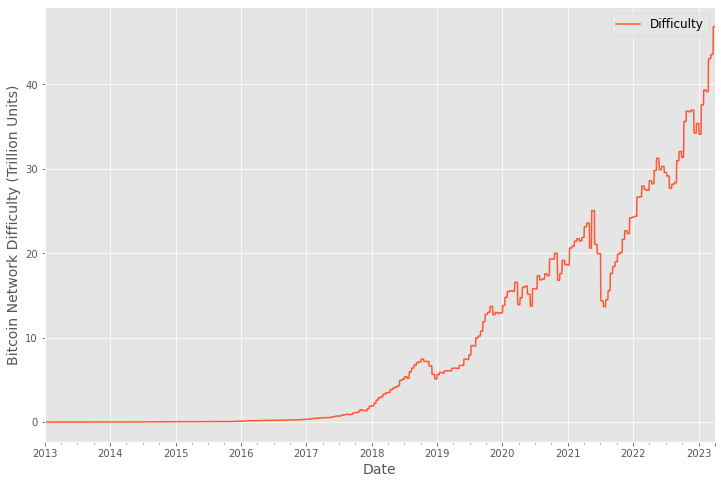

In [4]:
# Plot
plt.figure(figsize=(12, 8))  # Adjust size
data['difficulty'].plot(color='#FF5733')  # Change color
plt.xlabel("Date", fontsize=14)  # Increase font size
plt.ylabel("Bitcoin Network Difficulty (Trillion Units)", fontsize=14)  # Increase font size
plt.legend(["Difficulty"], loc='upper right', fontsize=12)  # Increase legend font size
plt.savefig("../output/02_charts/02_difficulty.png", dpi=300)
plt.show()

### GRAPH 2: Hashrates

In [5]:
# Read data
hashrates = pd.read_csv("../data/bitcoin/country-hashrate.csv")
hashrates['date'] = pd.to_datetime(hashrates['date'], format="%m/%d/%y")

# Keep China and US
hashrates = hashrates[hashrates['country'].isin(["Mainland China", "United States"])]

# Label variables
hashrates = hashrates.sort_values(by=['date', 'country'])
hashrates = hashrates.rename(columns = {"monthly_hashrate_%": "hashrate"})
hashrates = hashrates.drop(['monthly_absolute_hashrate_EH/S'], axis=1)
hashrates['hashrate'] = hashrates['hashrate'].str.strip("%").astype(float)
hashrates = hashrates.set_index(['date', 'country']).unstack('country')
hashrates.columns = hashrates.columns.map(' '.join)
hashrates['world'] = 100 - hashrates['hashrate Mainland China'] - hashrates['hashrate United States']

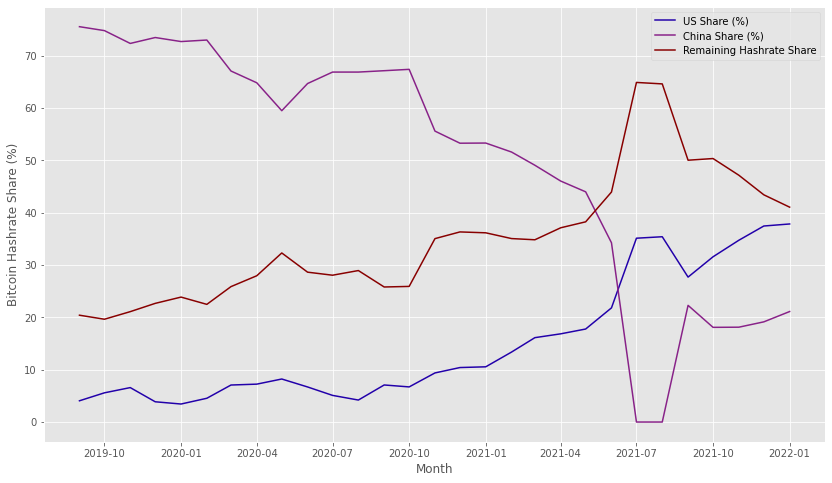

In [6]:
# Plot
plt.figure(figsize=(14, 8))  # Adjust size
plt.plot(hashrates.index, hashrates['hashrate United States'], color='#2200AA', label='US Share (%)')
plt.plot(hashrates.index, hashrates['hashrate Mainland China'], color='#882288', label='China Share (%)')
plt.plot(hashrates.index, hashrates['world'], color='#880000', label='Remaining Hashrate Share')
plt.xlabel("Month")
plt.ylabel("Bitcoin Hashrate Share (%)")
plt.legend(loc='upper right')
plt.savefig("../output/02_charts/02_country_share.png")
plt.show()

### Graph 3

In [7]:
# Set plotting style
plt.style.use('ggplot')

# Define colors
c1 = (204, 102, 119)
c2 = (68, 170, 153)

# GRAPH 3: Post-mining
# Read data
data = pd.read_csv("../data/processed/00_data.csv")

# Sum up and average
data = data.groupby(['year', 'month']).agg({'co2Mass': 'sum', 'btc': 'mean', 'mWhPerBTC': 'mean', 'costMWh': 'mean', 'paLMP': 'mean'}).reset_index()
data = data[data['year'] >= 2013]

# Normalize CO2 Mass
data['co2Mass'] /= 1000
data['newdate'] = pd.to_datetime('01/' + data['month'].astype(str) + '/' + data['year'].astype(str), format='%d/%m/%Y')
# data['newdate'] = data['month'].astype(str) + '-' + data['year'].astype(str)

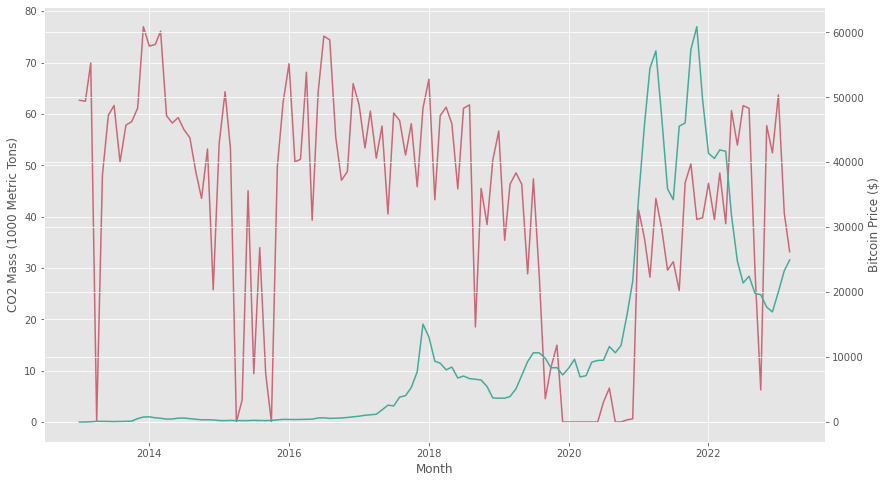

In [8]:
# Raw graph
plt.figure(figsize=(14, 8))
plt.plot(data['newdate'], data['co2Mass'], color='#CC6677')
plt.ylabel('CO2 Mass (1000 Metric Tons)')
plt.xlabel('Month')
plt.twinx()
plt.plot(data['newdate'], data['btc'], color='#44AA99')
plt.ylabel('Bitcoin Price ($)')
plt.savefig("../output/02_charts/02_btc_co2_residuals.png", dpi=300)
plt.show()

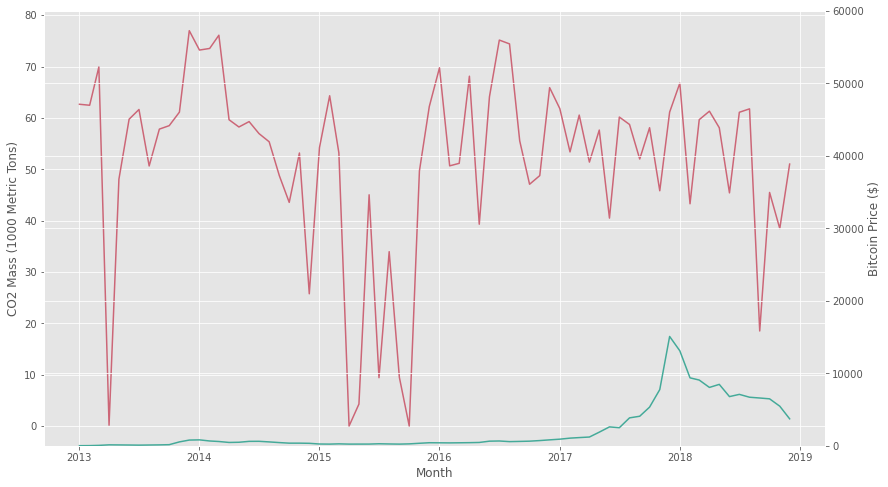

In [10]:
# GRAPH A7: Pre-mining
# Filter data
data_pre = data[data['year'] <= 2018]

# Raw graph
plt.figure(figsize=(14, 8))
plt.plot(data_pre['newdate'], data_pre['co2Mass'], color='#CC6677')
plt.ylabel('CO2 Mass (1000 Metric Tons)')
plt.xlabel('Month')
plt.twinx()
plt.plot(data_pre['newdate'], data_pre['btc'], color='#44AA99')
plt.ylabel('Bitcoin Price ($)')
plt.ylim(0, 60000)
plt.savefig("../output/02_charts/02_btc_co2_residuals_pre.png", dpi=300)
plt.show()